# Importing necesssary python libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Exploring Data Set

## Reading input file

In [3]:
df=pd.read_csv(r'C:\Users\Advait\Documents\Python Scripts\StudentsPerformance.csv')

## Checking headers in file

In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Lets see what kind of values have each column

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### So above information is only regarding numberic columns. No analysis on non-numberic columns

## Analysing Columns

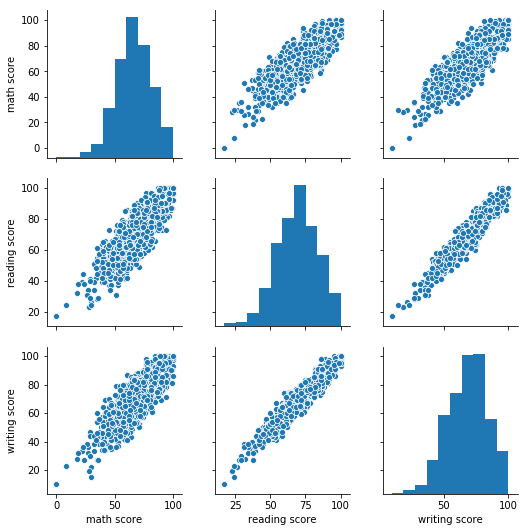

In [7]:
sns.pairplot(df)

### We have seen distribution of columns having values in number(above graphs). Lets see non-numeric features

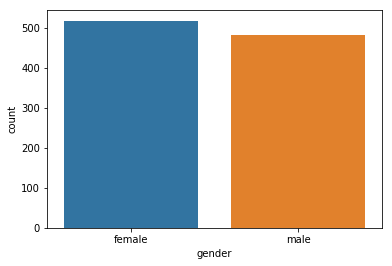

In [8]:
sns.countplot(x='gender',data=df)

In [9]:
sns.set_style("whitegrid", {'axes.grid' : True})

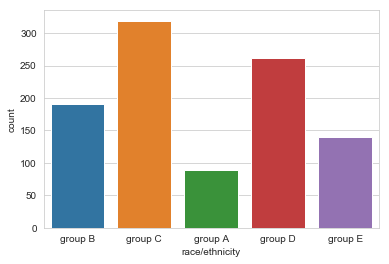

In [10]:
sns.countplot(x='race/ethnicity',data=df)

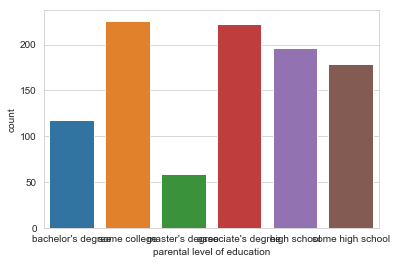

In [12]:
sns.countplot(x='parental level of education',data=df)

### The y-axis values in above graph are not clearly visible. Lets see the alternative to above.

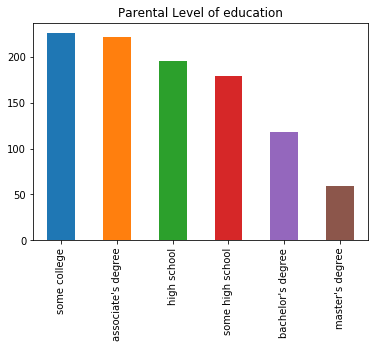

In [14]:
df['parental level of education'].value_counts().plot.bar(title="Parental Level of education")

# Lets do some real time analysis

## Lets compare student score on the basis of test preparation score

In [18]:
df.groupby('test preparation course').count()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
test preparation course,,,,,,,
completed,358,358,358,358,358,358,358
none,642,642,642,642,642,642,642


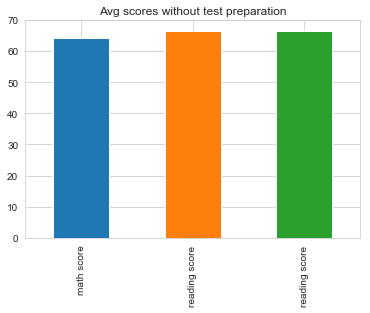

In [50]:
df[df['test preparation course']=='none'].mean()[['math score','reading score','reading score']].plot.bar(title="Avg scores without test preparation")

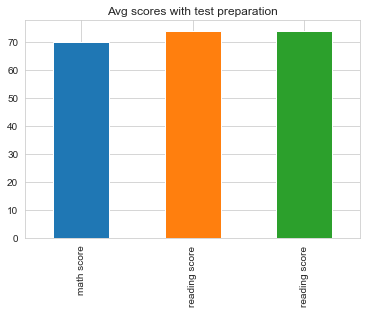

In [51]:
df[df['test preparation course']!='none'].mean()[['math score','reading score','reading score']].plot.bar(title="Avg scores with test preparation")

We can compare above the mean Math Score, Reading score and writing score is more for students who have taken the preparation test

In [24]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Lets compare student scores across ethnicity 

In [32]:
df1=df.groupby('race/ethnicity').describe()

In [39]:
df1

math score                                                 \
                    count       mean        std   min    25%   50%   75%   
race/ethnicity                                                             
group A              89.0  61.629213  14.523008  28.0  51.00  61.0  71.0   
group B             190.0  63.452632  15.468191   8.0  54.00  63.0  74.0   
group C             319.0  64.463950  14.852666   0.0  55.00  65.0  74.0   
group D             262.0  67.362595  13.769386  26.0  59.00  69.0  77.0   
group E             140.0  73.821429  15.534259  30.0  64.75  74.5  85.0   

                      reading score             ...                  \
                  max         count       mean  ...      75%    max   
race/ethnicity                                  ...                   
group A         100.0          89.0  64.674157  ...    74.00  100.0   
group B          97.0         190.0  67.352632  ...    79.75   97.0   
group C          98.0         319.0  69.103448  ...    78.50  100.0   
group D         100.0         262.0  70.030534  ...    79.00  100.0   
group E         100.0         140.0  73.028571  ...    84.00  100.0   

               writing score                                                  \
                       count       mean        std   min    25%   50%    75%   
race/ethnicity                                                                 
group A                 89.0  62.674157  15.468278  19.0  51.00  62.0  73.00   
group B                190.0  65.600000  15.625173  15.0  55.25  67.0  78.00   
group C                319.0  67.827586  14.983378  10.0  57.00  68.0  79.00   
group D                262.0  70.145038  14.367707  32.0  61.00  72.0  80.00   
group E                140.0  71.407143  15.113906  22.0  62.00  72.0  80.25   

                       
                  max  
race/ethnicity         
group A          97.0  
group B          96.0  
group C         100.0  
group D         100.0  
group E         100.0  

[5 rows x 24 columns]

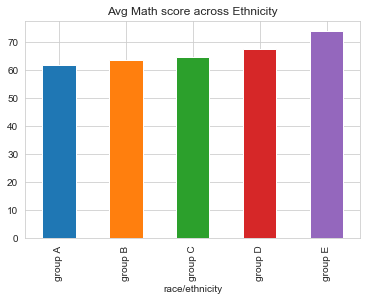

In [37]:
df1['math score']['mean'].plot.bar(title="Avg Math score across Ethnicity")

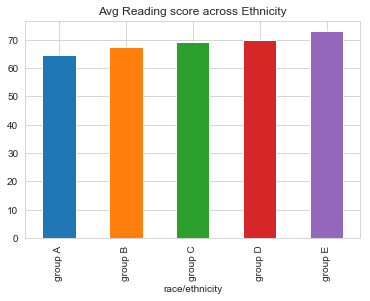

In [38]:
df1['reading score']['mean'].plot.bar(title="Avg Reading score across Ethnicity")

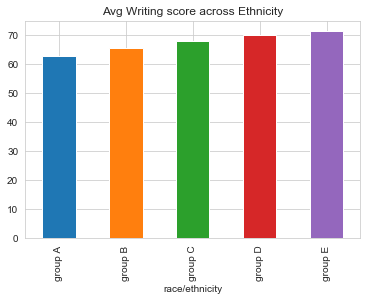

In [40]:
df1['writing score']['mean'].plot.bar(title="Avg Writing score across Ethnicity")

#### We can see in above that Group E students are topper in all 3 subject scores.

## Similarly we can do for parental level of education

In [53]:
df2=df.groupby('parental level of education').describe()

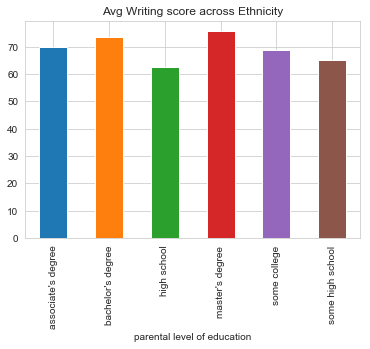

In [54]:
df2['writing score']['mean'].plot.bar(title="Avg Writing scores on various parental level education")

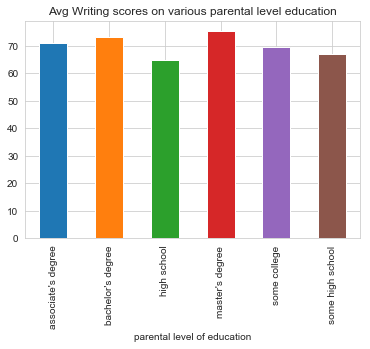

In [55]:
df2['reading score']['mean'].plot.bar(title="Avg Writing scores on various parental level education")

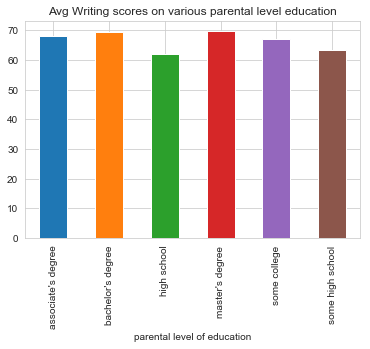

In [57]:
df2['math score']['mean'].plot.bar(title="Avg Writing scores on various parental level education")

We can conclude that students having parents with Master's Degree are good performer in all 3 subjects

## For gender score comparison

C:\Users\Advait\Anaconda3\lib\site-packages\matplotlib\transforms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


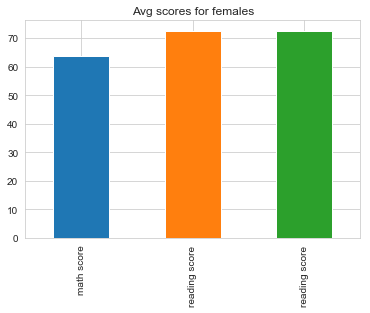

In [66]:
df[df['gender']=='female'].mean()[['math score','reading score','reading score']].plot.bar(title="Avg scores for females")

C:\Users\Advait\Anaconda3\lib\site-packages\matplotlib\transforms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


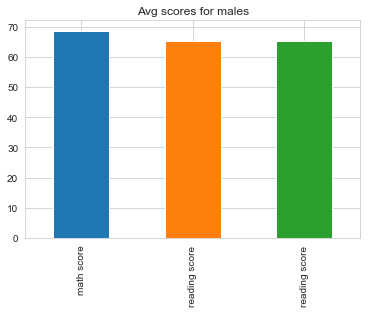

In [68]:
df[df['gender']=='male'].mean()[['math score','reading score','reading score']].plot.bar(title="Avg scores for males")

We can see that males are good in maths but lag in other 2 subjects when compared to females.

## Now on lunches

C:\Users\Advait\Anaconda3\lib\site-packages\matplotlib\transforms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


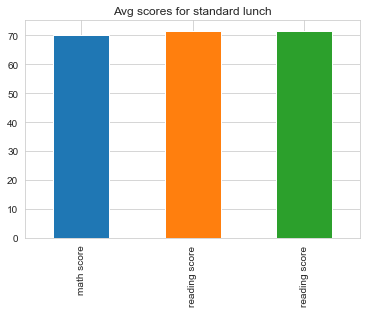

In [70]:
df[df['lunch']=='standard'].mean()[['math score','reading score','reading score']].plot.bar(title="Avg scores for standard lunch")

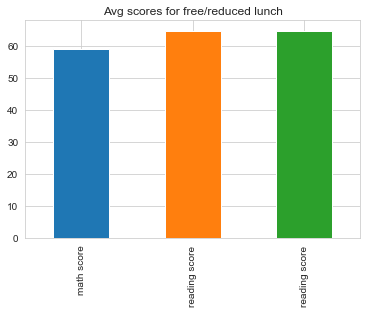

In [72]:
df[df['lunch']!='standard'].mean()[['math score','reading score','reading score']].plot.bar(title="Avg scores for free/reduced lunch")

Students with stadard lunches score more than students having free/reduced lunch.